In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
#General imports for Plotting and Data manipulation 
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import urllib.request, json
import os
import numpy as np
%matplotlib inline
from matplotlib.ticker import MaxNLocator
from IPython.display import clear_output
from packaging import version
from datetime import datetime, timedelta

#Sklearn imports
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold


In [2]:
#Import Stock Data
data = pd.read_csv('ISEQ.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,7171.649902,7327.689941,7171.649902,7314.939941,7314.939941,12513300
1,2020-01-03,7314.390137,7314.390137,7186.080078,7242.089844,7242.089844,12690200
2,2020-01-06,7242.419922,7242.419922,7086.930176,7210.640137,7210.640137,16800100
3,2020-01-07,7213.799805,7262.009766,7209.959961,7246.529785,7246.529785,21784500
4,2020-01-08,7238.180176,7238.180176,7173.660156,7211.870117,7211.870117,22861300


In [3]:
# Declare variables that represent the two most important featrures
# Date and Opening Price 

stock_open_prices = data['Open'].astype(np.float32)
stock_dates = data['Date']

stock_open_prices = np.array(stock_open_prices)
stock_dates = np.array(stock_dates)

stock = data.iloc[:, 1:2].values

#Adding day of week Number as feature
data['Date'] = pd.to_datetime(data['Date'],format='%Y-%m-%d')
data['dayofweek_num'] = data['Date'].dt.dayofweek  
data['DateIndex'] = np.arange(data.shape[0])

data.head()


,Date,Open,High,Low,Close,Adj Close,Volume,dayofweek_num,DateIndex
0,2020-01-02,7171.649902,7327.689941,7171.649902,7314.939941,7314.939941,12513300,3,0
1,2020-01-03,7314.390137,7314.390137,7186.080078,7242.089844,7242.089844,12690200,4,1
2,2020-01-06,7242.419922,7242.419922,7086.930176,7210.640137,7210.640137,16800100,0,2
3,2020-01-07,7213.799805,7262.009766,7209.959961,7246.529785,7246.529785,21784500,1,3
4,2020-01-08,7238.180176,7238.180176,7173.660156,7211.870117,7211.870117,22861300,2,4


In [4]:

cl = data.iloc[:, 2].values
scl = MinMaxScaler()
#Reshape the data
cl = cl.reshape(cl.shape[0],1)
cl = scl.fit_transform(cl)

In [5]:
#Create a function to process the data into 7 day look back slices 
def processData(data,lb):
    X,Y = [],[]
    for i in range(len(data)-lb-1):
        X.append(data[i:(i+lb),0])
        Y.append(data[(i+lb),0])
    return np.array(X),np.array(Y)

print("cl shape is: ", cl.shape)
#Process the data into the 7 day look back slices
X,y = processData(cl,50)

#Split data into into training and testing and into axes 
X_train, X_test = train_test_split(X, test_size=0.1, shuffle=False)
y_train, y_test = train_test_split(y, test_size=0.1, shuffle=False)

cl2 = data['dayofweek_num']
cl2 = cl2.values.astype('float32')
cl2 = cl2.reshape(cl2.shape[0], 1)
print("cl2 shape is: ",cl2.shape)

X1, y1 = processData(cl2,50)

# Re-do spilt with data representing day number features 90:10 split 
X_trainDN, X_testDN = train_test_split(X1, test_size=0.1, shuffle=False)
y_trainDN, y_testDN = train_test_split(y1, test_size=0.1, shuffle=False)

#Stack the training and test feautures 
X_train1 = np.dstack((X_train, X_trainDN))
X_test1 = np.dstack((X_test, X_testDN))

#y_train1 = np.dstack((y_train, y_testDN))
#y_test1 = np.dstack((y_test, y_testDN))

#Print the shapes -> we may need to reshape for training 
print("X train shape is", X_train.shape)
print("X train DN shape is", X_trainDN.shape)
print("X train 1 is: ", X_train1.shape)
print("")

print("X test shape is", X_test.shape)
print("X test DN shape is", X_testDN.shape)
print("X test 1 is: ", X_test1.shape)
print("")

print("y train shape is: ", y_train.shape)
print("y train DN shape: ", y_trainDN.shape)
#print("y train 1 is", y_train1.shape)
print("\n\n")
print("y test shape is",y_test.shape)
print("y test DN is ", y_testDN.shape)
#print("y test 1 is", y_test1.shape)

cl shape is:  (468, 1)
cl2 shape is:  (468, 1)
X train shape is (375, 50)
X train DN shape is (375, 50)
X train 1 is:  (375, 50, 2)

X test shape is (42, 50)
X test DN shape is (42, 50)
X test 1 is:  (42, 50, 2)

y train shape is:  (375,)
y train DN shape:  (375,)



y test shape is (42,)
y test DN is  (42,)


In [10]:
######### Lasso Model ###########

#Polynomial order has already been gotten 
Xpoly = PolynomialFeatures(1).fit_transform(X)
Xpoly1 = PolynomialFeatures(1).fit_transform(X1)



In [11]:
#Split data into traing and testing using Xpoly and Xpoly1 
X_train, X_test = train_test_split(Xpoly, test_size=0.1, shuffle=False)
y_train, y_test = train_test_split(y, test_size=0.1, shuffle=False)

X_trainDN, X_testDN = train_test_split(Xpoly1, test_size=0.1, shuffle=False)
y_trainDN, y_testDN = train_test_split(y1, test_size=0.1, shuffle=False)




In [12]:
X_train1 = np.dstack((X_train, X_trainDN))
X_test1 = np.dstack((X_test, X_testDN))

#y_train1 = np.dstack((y_train, y_testDN))
#y_test1 = np.dstack((y_test, y_testDN))


print("X train shape is", X_train.shape)
print("X train DN shape is", X_trainDN.shape)
print("X train 1 is: ", X_train1.shape)
print("")

print("X test shape is", X_test.shape)
print("X test DN shape is", X_testDN.shape)
print("X test 1 is: ", X_test1.shape)
print("")

print("y train shape is: ", y_train.shape)
print("y train DN shape: ", y_trainDN.shape)
#print("y train 1 is", y_train1.shape)
print("\n\n")
print("y test shape is",y_test.shape)
print("y test DN is ", y_testDN.shape)

X train shape is (375, 51)
X train DN shape is (375, 51)
X train 1 is:  (375, 51, 2)

X test shape is (42, 51)
X test DN shape is (42, 51)
X test 1 is:  (42, 51, 2)

y train shape is:  (375,)
y train DN shape:  (375,)



y test shape is (42,)
y test DN is  (42,)


In [13]:
#Reshape Xtrain1 and Xtest1 so they are 2 dimensional 
X_train1 = X_train1.reshape((X_train1.shape[0],(X_train1.shape[1]*X_train1.shape[2])))

X_test1 = X_test1.reshape((X_test1.shape[0],(X_test1.shape[1]*X_test1.shape[2])))

print(X_train1.shape)
print(X_test1.shape)

#Set the lasso model, the weight has already been gotten 
lasso = Lasso(alpha=0.000001, max_iter=10000)
lasso.fit(X_train1, y_train)

(375, 102)
(42, 102)


Lasso(alpha=1e-06, max_iter=10000)

Prediction Shape is:  (42,)


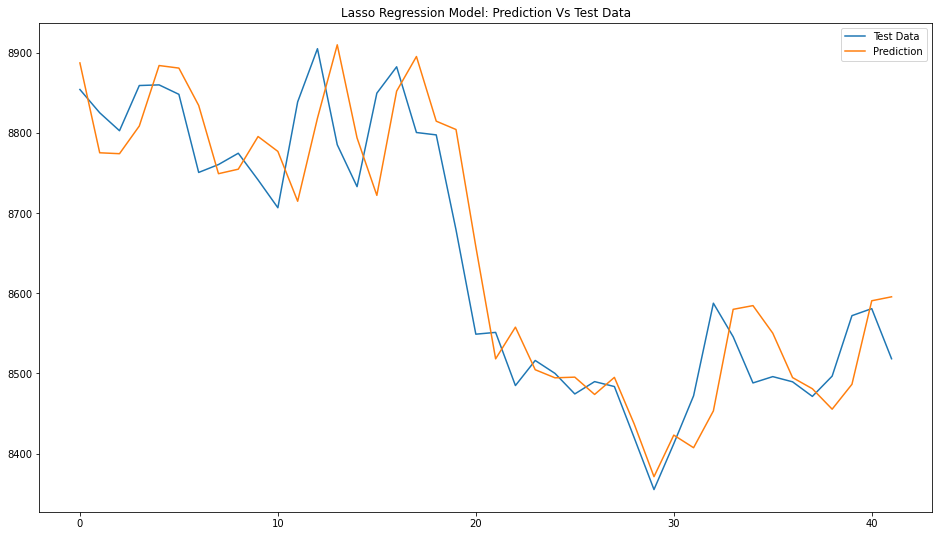

In [15]:
#get a prediction model using the testing data 
lasso_pre = lasso.predict(X_test1)
print("Prediction Shape is: ", lasso_pre.shape)
shape_l = lasso_pre.reshape(-1,1)

#Plot the prediction vs the testing data 
plt.figure(figsize=(16,9))
plt.plot(scl.inverse_transform(y_test.reshape(-1,1)) , label='Test Data')

plt.plot(scl.inverse_transform(shape_l), label='Prediction')
#prediction = scl.inverse_transform(linear_pre)
plt.legend()
plt.title('Lasso Regression Model: Prediction Vs Test Data')
plt.show()


In [16]:
#Parameters
print(lasso.coef_)
print("\n\n")
print(lasso.intercept_)
print("\n\n")
lasso_score = lasso.score(X_test1, y_test)
print('Lasso Model score: ', lasso_score)
print("\n\n")
print("Mean Square Error: ", mean_squared_error(y_test, lasso_pre))
print("\n\n")
print("Mean Absolute Error: ", mean_absolute_error(y_test, lasso_pre))
print("\n\n")

[ 0.00000000e+00  0.00000000e+00  5.70381132e-02 -1.57099513e-04
 -7.85806991e-02 -8.39272885e-04  3.53076074e-02 -2.75456921e-03
  0.00000000e+00 -5.27811977e-03 -7.18202216e-03 -3.36501887e-03
  3.78990383e-02  4.11730196e-04 -4.56917164e-02 -2.29393727e-04
  4.34129703e-02 -1.83900993e-03 -3.47282454e-02  3.36898745e-03
 -8.04450585e-02 -1.91275574e-03  4.61707100e-02 -6.43300349e-03
  1.14221647e-02  2.33831322e-03 -5.59752687e-02  2.60114929e-03
  5.99571606e-02 -2.95577270e-03 -0.00000000e+00  3.62274722e-03
  4.24742241e-02  2.25734870e-03 -4.07676860e-02 -2.89877374e-03
 -5.06383208e-02 -1.96148501e-03  1.37229604e-01  5.27781514e-04
 -1.00847758e-02 -2.41415935e-03 -6.80443340e-02  6.76330663e-05
  8.05730622e-02  2.48604338e-03 -1.07121571e-01  3.55313064e-03
  7.91195241e-02  1.98974096e-03 -6.22060928e-02  1.51637068e-04
 -2.45536926e-02  8.23370961e-04 -0.00000000e+00 -4.01992096e-03
  6.02342673e-02 -4.71829367e-03  2.94415970e-02 -2.75457827e-03
 -8.42475504e-02  1.76927

In [17]:
#Get Parameters with Training Data
lasso_pred1 = lasso.predict(X_train1)
lasso_score = lasso.score(X_train1, y_train)
print('Lasso Model score: ', lasso_score)
print("\n\n")
print("Mean Square Error: ", mean_squared_error(y_train, lasso_pred1))
print("\n\n")
print("Mean Absolute Error: ", mean_absolute_error(y_train, lasso_pred1))
print("\n\n")

Lasso Model score:  0.9951659952972991



Mean Square Error:  0.00028370121780875804



Mean Absolute Error:  0.012301301970802541





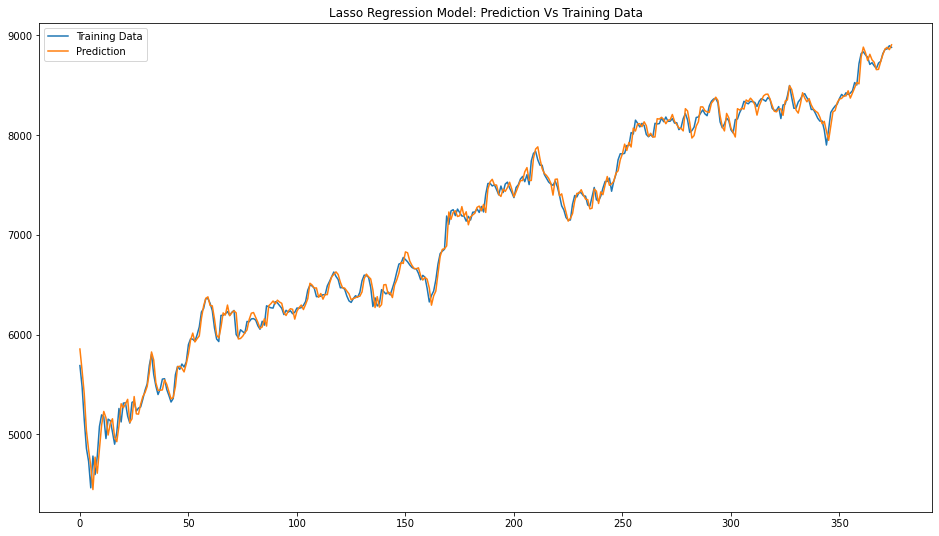

In [18]:
shape_l_2 = lasso_pred1.reshape(-1,1)

#Plot the prediction vs the testing data 
plt.figure(figsize=(16,9))
plt.plot(scl.inverse_transform(y_train.reshape(-1,1)) , label='Training Data')

plt.plot(scl.inverse_transform(shape_l_2), label='Prediction')
#prediction = scl.inverse_transform(linear_pre)
plt.legend()
plt.title('Lasso Regression Model: Prediction Vs Training Data')
plt.show()


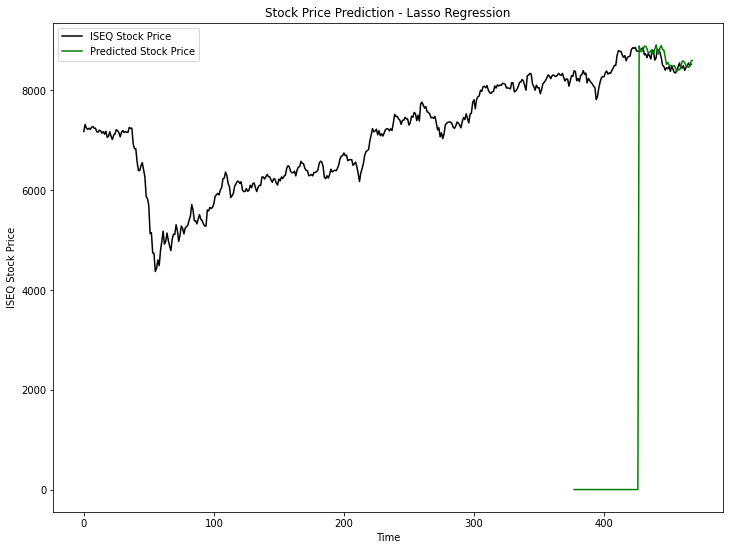

<Figure size 432x288 with 0 Axes>

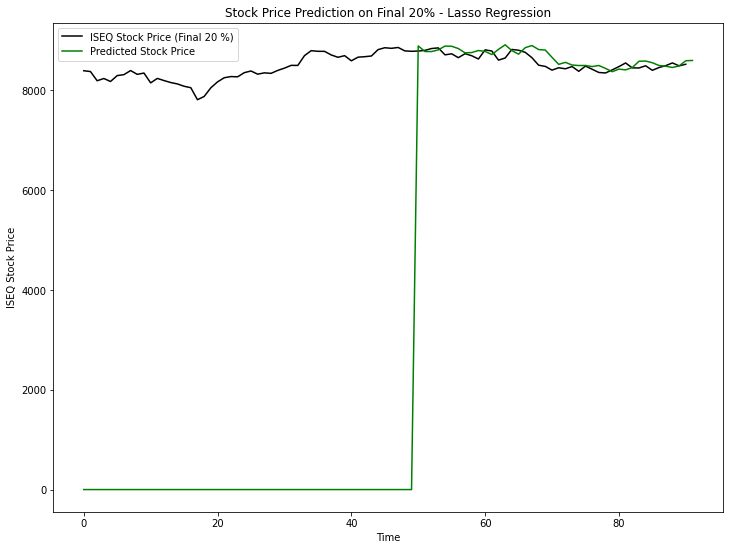

In [24]:
#We visualise the original data vs the Prediction of the final 20% of the stock data
prediction = scl.inverse_transform(shape_l)
prediction_main = np.zeros([469, 1], dtype = float) 
for i in range(0, 377):
    prediction_main[i] = None

for i in range(427, 469):
    prediction_main[i] = prediction[i - 427]

final40 = np.zeros([188, 1], dtype = float) 
for i in range(281, 468):
    final40[i-281] = stock[i]  
    
prediction_main2 = np.zeros([92, 1], dtype = float) 
for i in range(0, 92):
    prediction_main2[i] = prediction_main[i+377]

#plot our model against the opening price 
fig, ax = plt.subplots(figsize=(12,9))
plt.plot(stock, color='black', label='ISEQ Stock Price')
plt.plot(prediction_main, color='green', label='Predicted Stock Price')
plt.title('Stock Price Prediction - Lasso Regression')
#plt.title('Stock Price Prediction after 100 Epochs in training')
plt.xlabel('Time')
plt.ylabel('ISEQ Stock Price')
plt.legend()
plt.show()
plt.savefig('Lasso_Prediction.png')



fig, ax = plt.subplots(figsize=(12,9))    
plt.plot(stock[377:469, :], color='black', label='ISEQ Stock Price (Final 20 %)')
plt.plot(prediction_main2, color='green', label='Predicted Stock Price')
plt.title('Stock Price Prediction on Final 20% - Lasso Regression')
plt.xlabel('Time')
plt.ylabel('ISEQ Stock Price')
plt.legend()
plt.show()


In [25]:
######## Ridge Regression Model ###########

#Weight was already gotten 
ridge = Ridge(alpha=0.000001, max_iter=10000)
ridge.fit(X_train1, y_train)

Ridge(alpha=1e-06, max_iter=10000)

Prediction Shape is:  (42,)


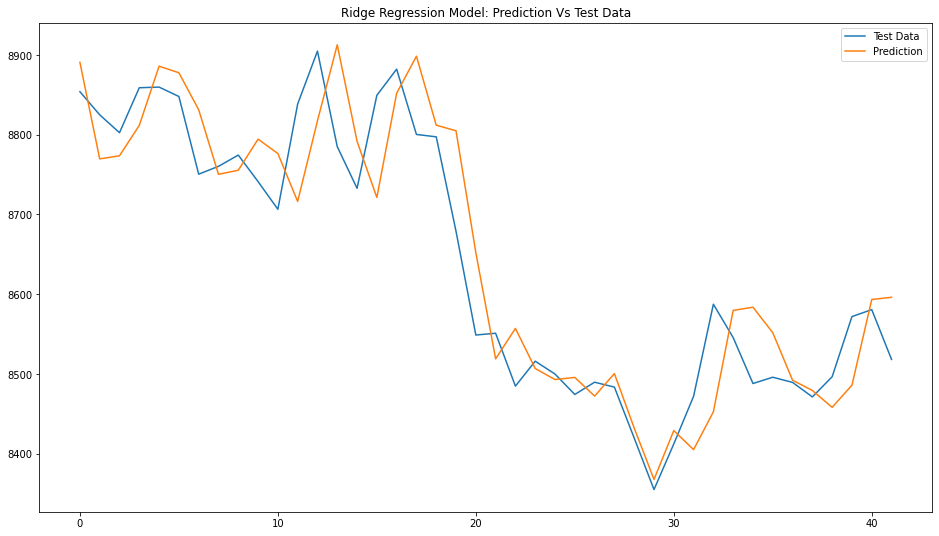

In [27]:
#Get the prediction model 
ridge_pre = ridge.predict(X_test1)
print("Prediction Shape is: ", ridge_pre.shape)
shape_r = ridge_pre.reshape(-1,1)

#Plot the prediction against the test data 
plt.figure(figsize=(16,9))
plt.plot(scl.inverse_transform(y_test.reshape(-1,1)) , label='Test Data')

plt.plot(scl.inverse_transform(shape_r), label='Prediction')
plt.legend()
plt.title('Ridge Regression Model: Prediction Vs Test Data')
plt.show()


In [28]:
#Parameters
print(ridge.coef_)
print("\n\n")
print(ridge.intercept_)
print("\n\n")
ridge_score = ridge.score(X_test1, y_test)
print('Ridge Model score: ', ridge_score)
print("\n\n")
print("Mean Square Error: ", mean_squared_error(y_test, ridge_pre))
print("\n\n")
print("Mean Absolute Error: ", mean_absolute_error(y_test, ridge_pre))
print("\n\n")

[ 0.00000000e+00  0.00000000e+00  6.37261561e-02 -1.56171878e-04
 -9.04202426e-02 -7.25847001e-04  4.17486743e-02 -2.75071272e-03
  5.31311632e-03 -5.23361027e-03 -2.64149959e-02 -3.30988984e-03
  6.10160734e-02  3.32074741e-04 -6.36777799e-02 -2.89557753e-04
  5.62483929e-02 -1.91816458e-03 -3.94285836e-02  3.52996658e-03
 -8.83878865e-02 -2.07205099e-03  5.38005310e-02 -6.41332345e-03
  2.39434743e-02  2.36749512e-03 -8.30110562e-02  2.73715530e-03
  8.38630546e-02 -3.18748210e-03 -1.92987092e-02  3.76489255e-03
  6.58138952e-02  2.33122679e-03 -5.81520046e-02 -2.95852093e-03
 -5.35717788e-02 -2.07501619e-03  1.50268763e-01  6.27590464e-04
 -1.44800782e-02 -2.39228376e-03 -8.24960896e-02 -7.23189795e-05
  1.03529161e-01  2.51393574e-03 -1.28914385e-01  3.67547569e-03
  1.00568482e-01  1.88518150e-03 -7.22315353e-02  1.64517690e-04
 -2.84100502e-02  9.98942960e-04  2.21406957e-04 -4.07011692e-03
  5.98328224e-02 -4.70466004e-03  4.65122737e-02 -2.89195243e-03
 -9.74360929e-02  1.92892

In [29]:
#Parameters of training data 
ridge_pred1 = ridge.predict(X_train1)
ridge_score = ridge.score(X_train1, y_train)
print('Ridge Model score: ', lasso_score)
print("\n\n")
print("Mean Square Error: ", mean_squared_error(y_train, ridge_pred1))
print("\n\n")
print("Mean Absolute Error: ", mean_absolute_error(y_train, ridge_pred1))
print("\n\n")

Ridge Model score:  0.9951659952972991



Mean Square Error:  0.00028312852256463436



Mean Absolute Error:  0.012314284731252565





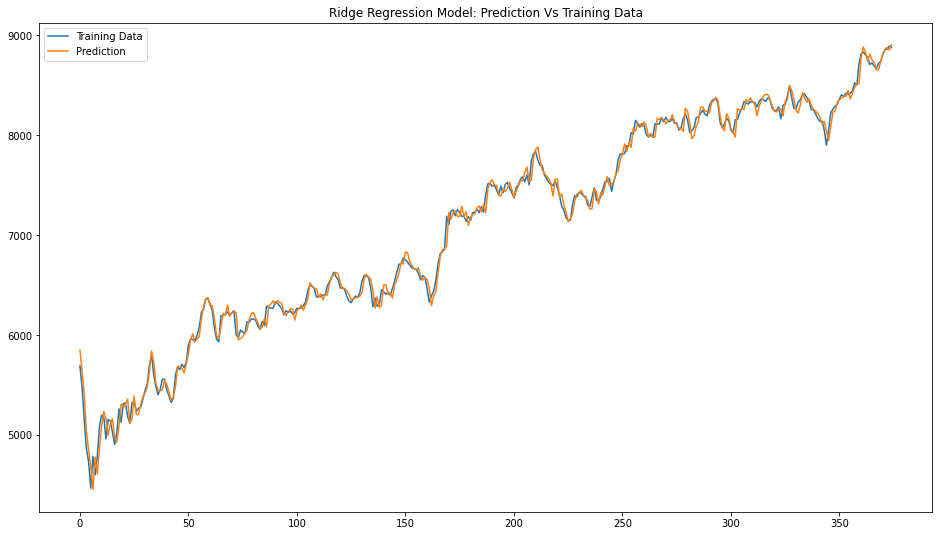

In [30]:
shape_r_2 = ridge_pred1.reshape(-1,1)

#Plot the prediction vs the training data 
plt.figure(figsize=(16,9))
plt.plot(scl.inverse_transform(y_train.reshape(-1,1)) , label='Training Data')

plt.plot(scl.inverse_transform(shape_r_2), label='Prediction')
plt.legend()
plt.title('Ridge Regression Model: Prediction Vs Training Data')
plt.show()

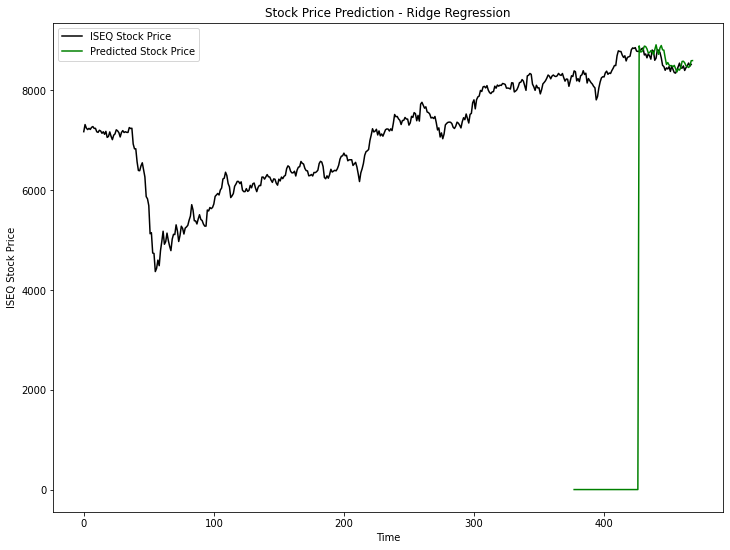

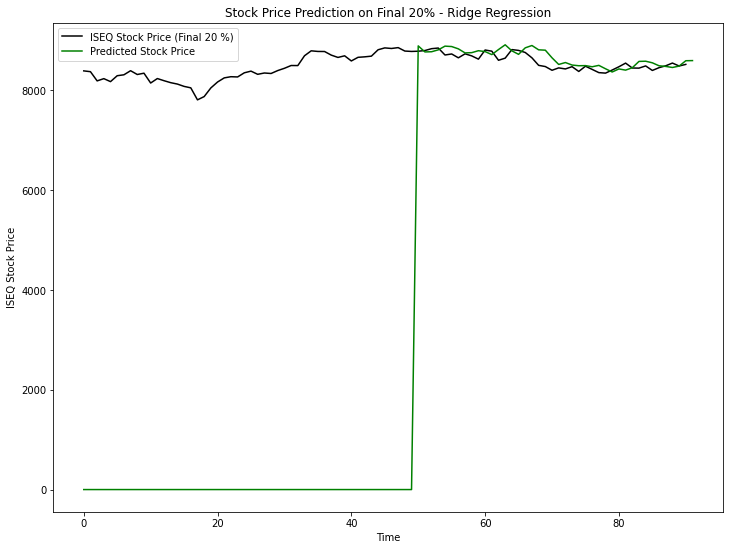

In [33]:
#We visualise the original data vs the Prediction of the final 20% of the stock data
prediction = scl.inverse_transform(shape_r)
prediction_main = np.zeros([469, 1], dtype = float) 
for i in range(0, 377):
    prediction_main[i] = None

for i in range(427, 469):
    prediction_main[i] = prediction[i - 427]

final40 = np.zeros([188, 1], dtype = float) 
for i in range(281, 468):
    final40[i-281] = stock[i]  
    
prediction_main2 = np.zeros([92, 1], dtype = float) 
for i in range(0, 92):
    prediction_main2[i] = prediction_main[i+377]

fig, ax = plt.subplots(figsize=(12,9))
plt.plot(stock, color = 'black', label = 'ISEQ Stock Price')
plt.plot(prediction_main, color = 'green', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction - Ridge Regression')
#plt.title('Stock Price Prediction after 100 Epochs in training')
plt.xlabel('Time')
plt.ylabel('ISEQ Stock Price')
plt.legend()
plt.show()

fig, ax = plt.subplots(figsize=(12,9))    
plt.plot(stock[377:469, :], color='black', label='ISEQ Stock Price (Final 20 %)')
plt.plot(prediction_main2, color='green', label='Predicted Stock Price')
plt.title('Stock Price Prediction on Final 20% - Ridge Regression')
plt.xlabel('Time')
plt.ylabel('ISEQ Stock Price')
plt.legend()
plt.show()
